In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [86]:
data_dir = '/home/jovyan/Tjaernoe2022-group5/data'


In [136]:
#micromol/mol
zep_h20 = pd.read_csv(os.path.join(data_dir,'ZEPPELIN_H2O_2020.csv'), index_col= 'start_date', parse_dates= True)

In [137]:
#nmol/mol
zep_co = pd.read_csv(os.path.join(data_dir,'ZEPPELIN_CO_2020.csv'), index_col= 'start_date', parse_dates= True)
zep_co_s = zep_co.loc[zep_h20.index,:]

In [138]:
zep_temp = pd.read_csv(os.path.join(data_dir,'ZEPPELIN_TEMP_2020.csv'), index_col= 'start_date', parse_dates= True)
zep_temp_s = zep_temp.loc[zep_h20.index,:]

In [117]:
#To use if people don't believe me
#zep_temp.loc[:,'meas':'start_date'].merge( zep_h20.loc[:,'meas':'start_date'],on = 'start_date',  suffixes=['temp','h20'])

In [139]:
zep_df = pd.DataFrame({'CO' : zep_co_s['meas'], 'H20':zep_h20['meas'], 'temp':zep_temp_s['meas'], 'time':zep_h20.index} )

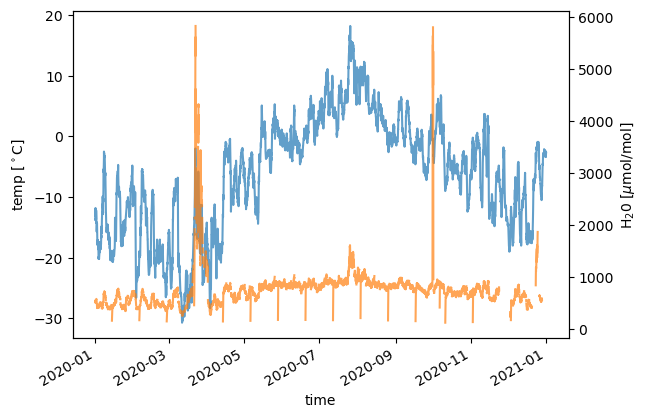

In [159]:
fig,ax =plt.subplots()
l_ax = zep_df.plot(x='time', y='temp', ax = ax, legend = False, ylabel= 'temp [$^\circ$C]', alpha=0.7)
r_ax =zep_df.plot(x='time',y='H20', secondary_y = True, ax = l_ax, legend = False, alpha=0.7)
#fig.legend(loc='upper left')
r_ax.set_ylabel('H$_2$0 [$\mu$mol/mol]')
plt.show()

In [192]:
AR_zep_df = zep_df.loc['2020-04-10':'2020-04-21',:]

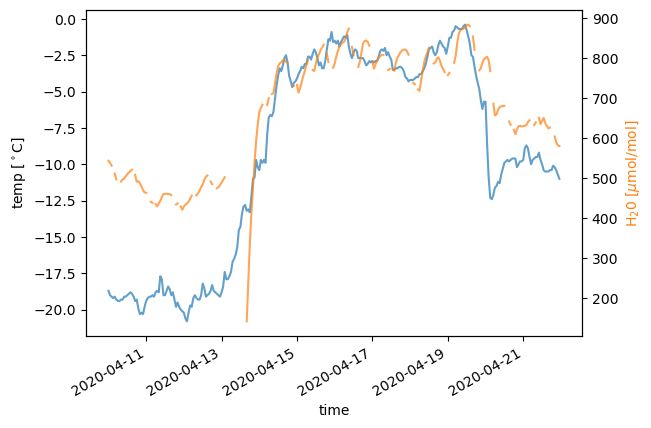

In [193]:

l_ax = AR_zep_df.plot(x='time', y='temp',  legend = False, ylabel= 'temp [$^\circ$C]', alpha=0.7)
r_ax =AR_zep_df.plot(x='time',y='H20', secondary_y = True, ax = l_ax, legend = False, alpha=0.7)
#fig.legend(loc='upper left')
r_ax.set_ylabel('H$_2$0 [$\mu$mol/mol]', color = 'tab:orange')
plt.show()

In [ ]:
fig,ax =plt.subplots()
ax.plot(zep_co['start_date'], zep_co['meas'], label = 'co')
ax2=ax.twinx()
ax2.plot(zep_h20['start_date'], zep_h20['meas'], label= 'h20', color = 'tab:orange')
ax.set_ylabel('CO', color = 'tab:blue')
ax2.set_ylabel('H20', color = 'tab:orange')
plt.show()

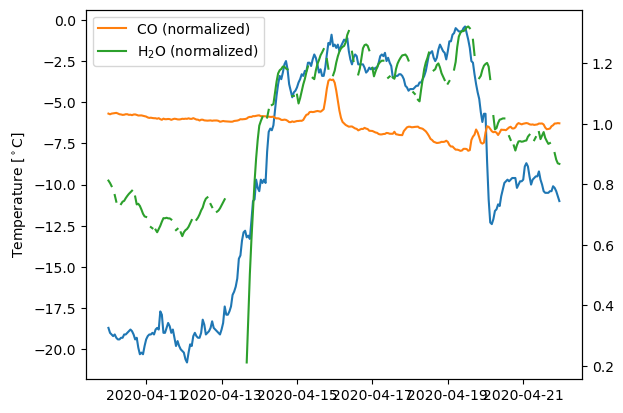

In [205]:
fig, ax = plt.subplots()
ax.plot(AR_zep_df.index, AR_zep_df['temp'], label = 'Temperature')
ax2= ax.twinx()
ax2.plot(AR_zep_df.index, AR_zep_df['CO']/AR_zep_df['CO'].mean(),color='tab:orange', label= 'CO (normalized)')
ax2.plot(AR_zep_df.index, AR_zep_df['H20']/AR_zep_df['H20'].mean(),color='tab:green', label= 'H$_2$O (normalized)')
ax.set_ylabel('Temperature [$^\circ$C]')
plt.xlabel('Time')
ax2.legend()
plt.show()

<AxesSubplot:xlabel='start_date'>

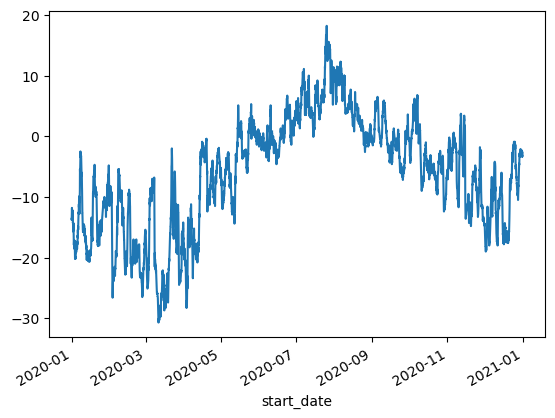

In [147]:
zep_df['temp'].plot()